Criar um classificador de músicas, definindo quem é o cantor.

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#classificador
from sklearn.linear_model import SGDClassifier
#selecao de daos de treino e teste
from sklearn.model_selection import train_test_split
#exibir metricas
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# vetorizador de texto
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
dataset = pd.read_csv('C:\\Users\\Felipe\\OneDrive - Fatec Centro Paula Souza\\BIG DATA_NO_AGRONEGÓCIO\\6° Termo\\Lab de Big Data\\Documentos\\Bases de Dados\\musicas.csv')
dataset.head()

,cantorId,cantorNome,musicaNome,letra
0,0,david-bowie,Heroes,"I, I will be king. And you, you will be queen...."
1,0,david-bowie,Starman,"Didn't know what time it was,. The lights were..."
2,0,david-bowie,Space Oddity,Ground control to Major Tom. Ground control to...
3,0,david-bowie,Life On Mars?,It's a god-awful small affair. To the girl wit...
4,0,david-bowie,Modern Love,I know when to go out. And when to stay in. Ge...


In [101]:
dataset.describe()

,cantorId
count,1748.000000
mean,1.518307
std,1.313140
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


In [102]:
# verificando as últimas n linhas
dataset.tail()

,cantorId,cantorNome,musicaNome,letra
1743,4,ac-dc,Who Made Who,The video game says Play me. Face it on a leve...
1744,4,ac-dc,Whole Lotta Rosie,Wanna tell you a story. 'Bout a woman I know. ...
1745,4,ac-dc,You Ain't Got A Hold On Me,You can roll me round your finger. You can rol...
1746,4,ac-dc,You Shook Me All Night Long,She was a fast machine. She kept the motor cle...
1747,4,ac-dc,You Shook Me All Night Long (Remix),"Give me a big beat. Now here this, now here th..."


In [103]:
#mostrar parte aleatória da base de dados:
dataset.sample()

,cantorId,cantorNome,musicaNome,letra
183,0,david-bowie,I Got You Babe (feat. Marianne Faithful),They say we're young and we don't know. We won...


## Criando variáveis do projeto

In [104]:
X = dataset['letra']
Y = dataset['cantorId']
nomes = dataset['cantorNome'].unique()

print(X)
print(Y)
print(nomes)
#convertendo todas as palavras para letras minusculas
palavras = X.str.lower().str.split()

0       I, I will be king. And you, you will be queen....
1       Didn't know what time it was,. The lights were...
2       Ground control to Major Tom. Ground control to...
3       It's a god-awful small affair. To the girl wit...
4       I know when to go out. And when to stay in. Ge...
                              ...                        
1743    The video game says Play me. Face it on a leve...
1744    Wanna tell you a story. 'Bout a woman I know. ...
1745    You can roll me round your finger. You can rol...
1746    She was a fast machine. She kept the motor cle...
1747    Give me a big beat. Now here this, now here th...
Name: letra, Length: 1748, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
1743    4
1744    4
1745    4
1746    4
1747    4
Name: cantorId, Length: 1748, dtype: int64
['david-bowie' 'paul-mccartney' 'laura-pausini' 'evanescence' 'ac-dc']


## Criando um dicinário com as palavras, afim de definir suas posições

In [105]:
# criando um dicionário com todas as palavras da variável X (letras)
dicionario = set()
for i in palavras:
    dicionario.update(i)
    
minhasPalavras = dict(zip(dicionario, range(len(dicionario))))

print(len(minhasPalavras), 'palavras')

for i in range(0,10):
    print(list(minhasPalavras.items())[i])

30685 palavras
("shoutin',", 0)
('dial.', 1)
('somewhere,', 2)
('climbs', 3)
('illusions', 4)
('will,', 5)
('svegliarti', 6)
('aiutare', 7)
('wallop', 8)
('ayer.', 9)


## Separando daods de treino e teste

In [106]:
# separando 30% para teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X,Y, test_size=0.3, random_state=42, shuffle=True)

## Vetorizando letras para numeros

In [107]:
txtvetorizador = TfidfVectorizer()

vetorXtreino = txtvetorizador.fit_transform(Xtreino)

## Treinando e vetorizando os dados do teste

In [108]:
# treinando
# penalty é 'L2' = l2 não é 12
modelo = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)

modelo.fit(vetorXtreino, Ytreino)

#Vetorizando os dados de teste
vetorXteste = txtvetorizador.transform(Xteste)

## Previsões e métricas

In [109]:
previsao = modelo.predict(vetorXteste)

In [110]:
print(metrics.classification_report(Yteste.values, previsao, target_names= nomes))

                precision    recall  f1-score   support

   david-bowie       0.66      0.71      0.68       140
paul-mccartney       0.68      0.73      0.70       146
 laura-pausini       0.92      0.91      0.92       125
   evanescence       0.92      0.52      0.67        44
         ac-dc       0.83      0.81      0.82        70

      accuracy                           0.76       525
     macro avg       0.80      0.74      0.76       525
  weighted avg       0.77      0.76      0.76       525



In [111]:
print(nomes, modelo.classes_)

['david-bowie' 'paul-mccartney' 'laura-pausini' 'evanescence' 'ac-dc'] [0 1 2 3 4]


In [112]:
# metricas
confusion_matrix = confusion_matrix(Yteste.values, previsao)
print(confusion_matrix)

[[100  33   0   1   6]
 [ 32 106   2   1   5]
 [  5   6 114   0   0]
 [  8   4   8  23   1]
 [  7   6   0   0  57]]


Text(0.5, 0, 'Classificações')

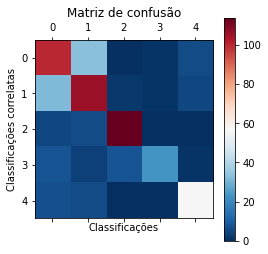

In [114]:
plt.matshow(confusion_matrix, cmap='RdBu_r')
plt.title('Matriz de confusão')
plt.colorbar()
plt.ylabel('Classificações correlatas')
plt.xlabel('Classificações')

In [116]:
print(nomes)
pd.crosstab(Yteste.values, previsao, rownames=['Real'], colnames=['previsto'], margins=True)

['david-bowie' 'paul-mccartney' 'laura-pausini' 'evanescence' 'ac-dc']


previsto,0,1,2,3,4,All
Real,,,,,,
0,100,33,0,1,6,140
1,32,106,2,1,5,146
2,5,6,114,0,0,125
3,8,4,8,23,1,44
4,7,6,0,0,57,70
All,152,155,124,25,69,525


## Testando o modelo com novas músicas


In [118]:
novosTrechos = [
    "we used to say we live and let live",
    "Proyecto de vida en comúnlLo sé todo el abismo que ves",
    "Inch worm, inch worm. Measuring the marigolds"
]

In [122]:
#Vetorizando
novoVetor = txtvetorizador.transform(novosTrechos)
previsao = modelo.predict(novoVetor)
print('Previsões')
for trecho, artista in zip(novosTrechos, previsao):
    print(f'Trecho: {trecho}')
    print(f'Artista previsto: {nomes[artista]}')

Previsões
Trecho: we used to say we live and let live
Artista previsto: paul-mccartney
Trecho: Proyecto de vida en comúnlLo sé todo el abismo que ves
Artista previsto: laura-pausini
Trecho: Inch worm, inch worm. Measuring the marigolds
Artista previsto: paul-mccartney


# Desafio
Utilizar outro classificador, como o MPLClassifier. Este classificador é baseado em redes neurais. Pesquise sobre a biblioteca Sklearn.neural_network e como utilziar o MPLClassifier. Refaça a mesma aplicação com este novo classificador e avalie os resultados obtidos.

In [125]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [127]:
X, Y = make_classification(n_samples=100, random_state=1)

In [142]:
model = MLPClassifier(random_state=1, max_iter=300)
# clf.predict(X_test)
model.fit(vetorXtreino, Ytreino)

MLPClassifier(max_iter=300, random_state=1)

In [143]:
previsao = model.predict(vetorXteste)

In [147]:
print(metrics.classification_report(Yteste.values, previsao, target_names= nomes))

                precision    recall  f1-score   support

   david-bowie       0.68      0.66      0.67       140
paul-mccartney       0.66      0.77      0.71       146
 laura-pausini       0.93      0.92      0.92       125
   evanescence       0.93      0.61      0.74        44
         ac-dc       0.86      0.81      0.84        70

      accuracy                           0.77       525
     macro avg       0.81      0.76      0.78       525
  weighted avg       0.78      0.77      0.77       525



# metricas

Text(0.5, 0, 'Classificações')

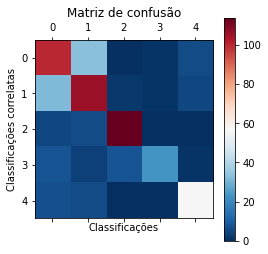

In [151]:
plt.matshow(confusion_matrix, cmap='RdBu_r')
plt.title('Matriz de confusão')
plt.colorbar()
plt.ylabel('Classificações correlatas')
plt.xlabel('Classificações')


In [153]:
print(nomes)
pd.crosstab(Yteste.values, previsao, rownames=['Real'], colnames=['previsto'], margins=True)

['david-bowie' 'paul-mccartney' 'laura-pausini' 'evanescence' 'ac-dc']


previsto,0,1,2,3,4,All
Real,,,,,,
0,93,42,0,2,3,140
1,26,112,2,0,6,146
2,5,5,115,0,0,125
3,6,4,7,27,0,44
4,7,6,0,0,57,70
All,137,169,124,29,66,525


In [155]:
novosTrechos = [
    "we used to say we live and let live",
    "Proyecto de vida en comúnlLo sé todo el abismo que ves",
    "Inch worm, inch worm. Measuring the marigolds"
]

In [156]:
#Vetorizando
novoVetor = txtvetorizador.transform(novosTrechos)
previsao = modelo.predict(novoVetor)
print('Previsões')
for trecho, artista in zip(novosTrechos, previsao):
    print(f'Trecho: {trecho}')
    print(f'Artista previsto: {nomes[artista]}')

Previsões
Trecho: we used to say we live and let live
Artista previsto: paul-mccartney
Trecho: Proyecto de vida en comúnlLo sé todo el abismo que ves
Artista previsto: laura-pausini
Trecho: Inch worm, inch worm. Measuring the marigolds
Artista previsto: paul-mccartney
